In [8]:
import os
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D,BatchNormalization
from keras import optimizers
from keras import backend as k
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from matplotlib.image import imread

In [33]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:

trainDataGen=ImageDataGenerator(rotation_range = 5,
		width_shift_range = 0.1,
		height_shift_range = 0.1,
		rescale = 1.0/255,
		shear_range = 0.2,
		zoom_range = 0.2,		
		horizontal_flip = False,
		fill_mode = 'nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

trainGenerator = trainDataGen.flow_from_directory(
			"/content/drive/My Drive/DevanagariHandwrittenCharacterDataset/Train",
			target_size = (32,32),
			batch_size = 32,
			color_mode = "grayscale",
			class_mode = "categorical")

Found 500 images belonging to 10 classes.


In [35]:
labels=['0','1','2','3','4','5','6','7','8','9']

In [36]:
validation_generator = test_datagen.flow_from_directory(
			"/content/drive/My Drive/DevanagariHandwrittenCharacterDataset/Test",
			target_size=(32,32),
			batch_size=32,
			color_mode = "grayscale",
			class_mode= 'categorical')

Found 120 images belonging to 10 classes.


In [37]:
model1=Sequential()
#Single Dense Layer with 32 nodes in it

model1.add(Dense(32,activation='relu',input_shape=(32,32,1)))

#Output Layer
model1.add(Flatten())
model1.add(Dense(10,activation='softmax'))

In [38]:
model1.compile(optimizer = "adam",
		loss = "categorical_crossentropy",
		metrics = ["accuracy"])
		
print(model1.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 32, 32, 32)        64        
_________________________________________________________________
flatten_3 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                327690    
Total params: 327,754
Trainable params: 327,754
Non-trainable params: 0
_________________________________________________________________
None


In [40]:
res=model1.fit_generator(
		trainGenerator,
		epochs = 10,
		validation_data = validation_generator,
		validation_steps = 432
		)

Epoch 1/10
16/16 [==============================] - 188s 12s/step - loss: 1.3814 - accuracy: 0.7020 - val_loss: 0.7353 - val_accuracy: 0.8667
Epoch 2/10
16/16 [==============================] - 1s 53ms/step - loss: 0.9123 - accuracy: 0.7860
Epoch 3/10
16/16 [==============================] - 1s 52ms/step - loss: 0.6454 - accuracy: 0.8300
Epoch 4/10
16/16 [==============================] - 1s 55ms/step - loss: 0.5591 - accuracy: 0.8440
Epoch 5/10
16/16 [==============================] - 1s 50ms/step - loss: 0.5059 - accuracy: 0.8540
Epoch 6/10
16/16 [==============================] - 1s 51ms/step - loss: 0.4314 - accuracy: 0.9000
Epoch 7/10
16/16 [==============================] - 1s 55ms/step - loss: 0.4543 - accuracy: 0.8740
Epoch 8/10
16/16 [==============================] - 1s 51ms/step - loss: 0.4270 - accuracy: 0.8600
Epoch 9/10
16/16 [==============================] - 1s 52ms/step - loss: 0.4269 - accuracy: 0.8880
Epoch 10/10
16/16 [==============================] - 1s 52ms/step 

In [41]:
%matplotlib inline
accu=res.history['accuracy']
val_acc=res.history['val_accuracy']
loss=res.history['loss']
val_loss=res.history['val_loss']

epochs=range(len(accu))

<Figure size 432x288 with 0 Axes>

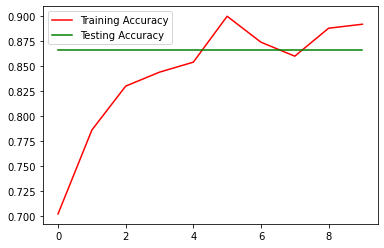

<Figure size 432x288 with 0 Axes>

In [52]:
plt.plot(epochs,accu,'r',label='Training Accuracy')
plt.plot(epochs,val_acc*10,'g',label='Testing Accuracy')
plt.legend()
plt.figure()

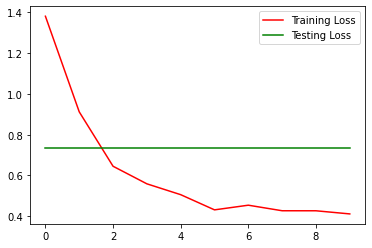

In [53]:
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss*10,'g',label='Testing Loss')
plt.legend()
plt.show()

In [55]:
model2=Sequential()
#Single Dense Layer with 8 nodes in it

model2.add(Dense(8,activation='relu',input_shape=(32,32,1)))

#Output Layer
model2.add(Flatten())
model2.add(Dense(10,activation='softmax'))

model2.compile(optimizer = "adam",
		loss = "categorical_crossentropy",
		metrics = ["accuracy"])
		
print(model2.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 32, 32, 8)         16        
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)                81930     
Total params: 81,946
Trainable params: 81,946
Non-trainable params: 0
_________________________________________________________________
None


In [59]:
res1=model2.fit_generator(
		trainGenerator,
		epochs = 10,
		validation_data = validation_generator,
		validation_steps = 432
		)

Epoch 1/10
16/16 [==============================] - 1s 59ms/step - loss: 0.3091 - accuracy: 0.9200 - val_loss: 0.1494 - val_accuracy: 0.9583
Epoch 2/10
16/16 [==============================] - 1s 47ms/step - loss: 0.3290 - accuracy: 0.9080
Epoch 3/10
16/16 [==============================] - 1s 49ms/step - loss: 0.2600 - accuracy: 0.9120
Epoch 4/10
16/16 [==============================] - 1s 48ms/step - loss: 0.2708 - accuracy: 0.9280
Epoch 5/10
16/16 [==============================] - 1s 46ms/step - loss: 0.2654 - accuracy: 0.9240
Epoch 6/10
16/16 [==============================] - 1s 47ms/step - loss: 0.3262 - accuracy: 0.9060
Epoch 7/10
16/16 [==============================] - 1s 49ms/step - loss: 0.2669 - accuracy: 0.9240
Epoch 8/10
16/16 [==============================] - 1s 48ms/step - loss: 0.3194 - accuracy: 0.9060
Epoch 9/10
16/16 [==============================] - 1s 47ms/step - loss: 0.2824 - accuracy: 0.9040
Epoch 10/10
16/16 [==============================] - 1s 47ms/step -

In [60]:
%matplotlib inline
accu=res1.history['accuracy']
val_acc=res1.history['val_accuracy']
loss=res1.history['loss']
val_loss=res1.history['val_loss']

epochs=range(len(accu))

<Figure size 432x288 with 0 Axes>

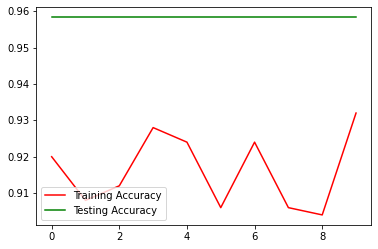

<Figure size 432x288 with 0 Axes>

In [61]:
plt.plot(epochs,accu,'r',label='Training Accuracy')
plt.plot(epochs,val_acc*10,'g',label='Testing Accuracy')
plt.legend()
plt.figure()

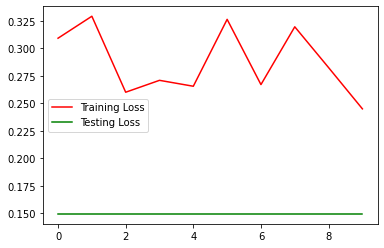

In [62]:
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss*10,'g',label='Testing Loss')
plt.legend()
plt.show()

In [63]:
model3=Sequential()
#Single Dense Layer with 16 nodes in it

model3.add(Dense(16,activation='relu',input_shape=(32,32,1)))

#Output Layer
model3.add(Flatten())
model3.add(Dense(10,activation='softmax'))

model3.compile(optimizer = "adam",
		loss = "categorical_crossentropy",
		metrics = ["accuracy"])
		
print(model3.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 32, 32, 16)        32        
_________________________________________________________________
flatten_5 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                163850    
Total params: 163,882
Trainable params: 163,882
Non-trainable params: 0
_________________________________________________________________
None


In [64]:
res2=model3.fit_generator(
		trainGenerator,
		epochs = 10,
		validation_data = validation_generator,
		validation_steps = 432
		)

Epoch 1/10
16/16 [==============================] - 1s 69ms/step - loss: 1.9004 - accuracy: 0.4280 - val_loss: 1.2011 - val_accuracy: 0.8000
Epoch 2/10
16/16 [==============================] - 1s 50ms/step - loss: 1.2023 - accuracy: 0.7700
Epoch 3/10
16/16 [==============================] - 1s 49ms/step - loss: 0.9037 - accuracy: 0.8060
Epoch 4/10
16/16 [==============================] - 1s 49ms/step - loss: 0.7359 - accuracy: 0.8020
Epoch 5/10
16/16 [==============================] - 1s 51ms/step - loss: 0.5729 - accuracy: 0.8660
Epoch 6/10
16/16 [==============================] - 1s 49ms/step - loss: 0.5284 - accuracy: 0.8780
Epoch 7/10
16/16 [==============================] - 1s 50ms/step - loss: 0.4713 - accuracy: 0.8760
Epoch 8/10
16/16 [==============================] - 1s 49ms/step - loss: 0.4660 - accuracy: 0.8720
Epoch 9/10
16/16 [==============================] - 1s 50ms/step - loss: 0.4182 - accuracy: 0.8860
Epoch 10/10
16/16 [==============================] - 1s 52ms/step -

In [65]:
%matplotlib inline
accu=res2.history['accuracy']
val_acc=res2.history['val_accuracy']
loss=res2.history['loss']
val_loss=res2.history['val_loss']

epochs=range(len(accu))

<Figure size 432x288 with 0 Axes>

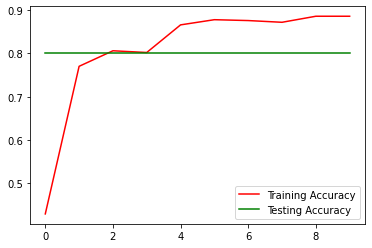

<Figure size 432x288 with 0 Axes>

In [66]:
plt.plot(epochs,accu,'r',label='Training Accuracy')
plt.plot(epochs,val_acc*10,'g',label='Testing Accuracy')
plt.legend()
plt.figure()

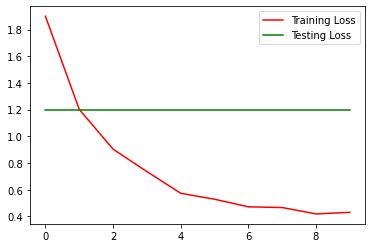

In [67]:
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss*10,'g',label='Testing Loss')
plt.legend()
plt.show()

In [68]:
model4=Sequential()
#Single Dense Layer with 1028 nodes in it

model4.add(Dense(1028,activation='relu',input_shape=(32,32,1)))

#Output Layer
model4.add(Flatten())
model4.add(Dense(10,activation='softmax'))

model4.compile(optimizer = "adam",
		loss = "categorical_crossentropy",
		metrics = ["accuracy"])
		
print(model4.summary())

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 32, 32, 1028)      2056      
_________________________________________________________________
flatten_6 (Flatten)          (None, 1052672)           0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                10526730  
Total params: 10,528,786
Trainable params: 10,528,786
Non-trainable params: 0
_________________________________________________________________
None


In [69]:
res2=model4.fit_generator(
		trainGenerator,
		epochs = 10,
		validation_data = validation_generator,
		validation_steps = 432
		)

Epoch 1/10
16/16 [==============================] - 5s 338ms/step - loss: 1.1420 - accuracy: 0.6260 - val_loss: 0.4027 - val_accuracy: 0.8667
Epoch 2/10
16/16 [==============================] - 5s 294ms/step - loss: 0.5436 - accuracy: 0.8280
Epoch 3/10
16/16 [==============================] - 5s 300ms/step - loss: 0.4936 - accuracy: 0.8360
Epoch 4/10
16/16 [==============================] - 5s 295ms/step - loss: 0.5260 - accuracy: 0.8480
Epoch 5/10
16/16 [==============================] - 5s 295ms/step - loss: 0.4198 - accuracy: 0.8700
Epoch 6/10
16/16 [==============================] - 5s 296ms/step - loss: 0.3505 - accuracy: 0.8940
Epoch 7/10
16/16 [==============================] - 5s 293ms/step - loss: 0.3894 - accuracy: 0.8880
Epoch 8/10
16/16 [==============================] - 5s 291ms/step - loss: 0.3846 - accuracy: 0.8780
Epoch 9/10
16/16 [==============================] - 5s 297ms/step - loss: 0.4106 - accuracy: 0.8780
Epoch 10/10
16/16 [==============================] - 5s 29

In [70]:
%matplotlib inline
accu=res2.history['accuracy']
val_acc=res2.history['val_accuracy']
loss=res2.history['loss']
val_loss=res2.history['val_loss']

epochs=range(len(accu))

<Figure size 432x288 with 0 Axes>

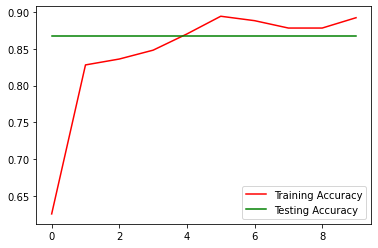

<Figure size 432x288 with 0 Axes>

In [71]:
plt.plot(epochs,accu,'r',label='Training Accuracy')
plt.plot(epochs,val_acc*10,'g',label='Testing Accuracy')
plt.legend()
plt.figure()

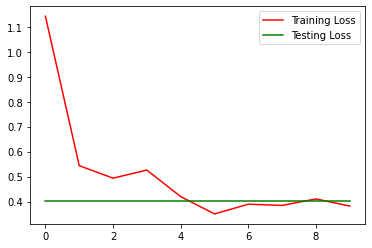

In [72]:
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss*10,'g',label='Testing Loss')
plt.legend()
plt.show()

In [73]:
model5=Sequential()
#5 Dense Layer with 32 nodes in it

model5.add(Dense(32,activation='relu',input_shape=(32,32,1)))
model5.add(Dense(32,activation='relu'))
model5.add(Dense(32,activation='relu'))
model5.add(Dense(32,activation='relu'))
model5.add(Dense(32,activation='relu'))

#Output Layer
model5.add(Flatten())
model5.add(Dense(10,activation='softmax'))

model5.compile(optimizer = "adam",
		loss = "categorical_crossentropy",
		metrics = ["accuracy"])
		
print(model5.summary())

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 32, 32, 32)        64        
_________________________________________________________________
dense_26 (Dense)             (None, 32, 32, 32)        1056      
_________________________________________________________________
dense_27 (Dense)             (None, 32, 32, 32)        1056      
_________________________________________________________________
dense_28 (Dense)             (None, 32, 32, 32)        1056      
_________________________________________________________________
dense_29 (Dense)             (None, 32, 32, 32)        1056      
_________________________________________________________________
flatten_7 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_30 (Dense)             (None, 10)              

In [74]:
res3=model5.fit_generator(
		trainGenerator,
		epochs = 10,
		validation_data = validation_generator,
		validation_steps = 432
		)

Epoch 1/10
16/16 [==============================] - 2s 98ms/step - loss: 1.9820 - accuracy: 0.4560 - val_loss: 1.1290 - val_accuracy: 0.8250
Epoch 2/10
16/16 [==============================] - 1s 73ms/step - loss: 0.8981 - accuracy: 0.7680
Epoch 3/10
16/16 [==============================] - 1s 74ms/step - loss: 0.5302 - accuracy: 0.8240
Epoch 4/10
16/16 [==============================] - 1s 71ms/step - loss: 0.5196 - accuracy: 0.8280
Epoch 5/10
16/16 [==============================] - 1s 71ms/step - loss: 0.3751 - accuracy: 0.8780
Epoch 6/10
16/16 [==============================] - 1s 72ms/step - loss: 0.3185 - accuracy: 0.9020
Epoch 7/10
16/16 [==============================] - 1s 73ms/step - loss: 0.3626 - accuracy: 0.8880
Epoch 8/10
16/16 [==============================] - 1s 72ms/step - loss: 0.3184 - accuracy: 0.9000
Epoch 9/10
16/16 [==============================] - 1s 71ms/step - loss: 0.3409 - accuracy: 0.8900
Epoch 10/10
16/16 [==============================] - 1s 71ms/step -

In [75]:
%matplotlib inline
accu=res2.history['accuracy']
val_acc=res2.history['val_accuracy']
loss=res2.history['loss']
val_loss=res2.history['val_loss']

epochs=range(len(accu))

<Figure size 432x288 with 0 Axes>

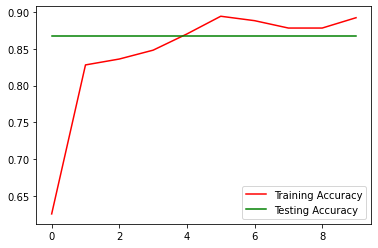

<Figure size 432x288 with 0 Axes>

In [76]:
plt.plot(epochs,accu,'r',label='Training Accuracy')
plt.plot(epochs,val_acc*10,'g',label='Testing Accuracy')
plt.legend()
plt.figure()

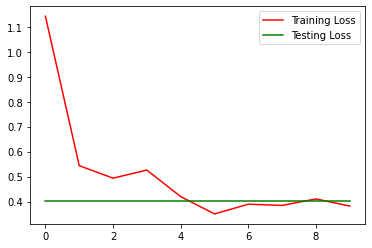

In [77]:
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss*10,'g',label='Testing Loss')
plt.legend()
plt.show()